In [8]:
!pip install matplotlib==3.3.3

     ---------------------------------------- 0.0/37.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/37.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/37.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/37.9 MB ? eta -:--:--
     ---------------------------------------- 0.3/37.9 MB ? eta -:--:--
     ---------------------------------------- 0.3/37.9 MB ? eta -:--:--
      -------------------------------------- 0.5/37.9 MB 479.2 kB/s eta 0:01:19
      -------------------------------------- 0.5/37.9 MB 479.2 kB/s eta 0:01:19
      -------------------------------------- 0.5/37.9 MB 479.2 kB/s eta 0:01:19
      -------------------------------------- 0.5/37.9 MB 479.2 kB/s eta 0:01:19
      -------------------------------------- 0.8/37.9 MB 404.2 kB/s eta 0:01:32
      -------------------------------------- 0.8/37.9 MB 404.2 kB/s eta 0:01:32
     - ------------------------------------- 1.0/37.9 MB 445.3 kB/s eta 0:01:23
     - -

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [28 lines of output]
      C:\Users\hp\AppData\Local\Temp\pip-install-7s3b3006\matplotlib_5138aa66f1d04efd932cc28749f44457\setup.py:32: SetuptoolsDeprecationWarning: The test command is disabled and references to it are deprecated.
      !!
      
              ********************************************************************************
              Please remove any references to `setuptools.command.test` in all supported versions of the affected package.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
              ********************************************************************************
      
      !!
        from setuptools.command.test import test as TestCommand
      Traceback (most recent call last):
        File "<string>", line 2, in <module

In [7]:
!pip install seaborn --upgrade

C:\Users\hp\AppData\Local\Temp\ipykernel_17692\408532687.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


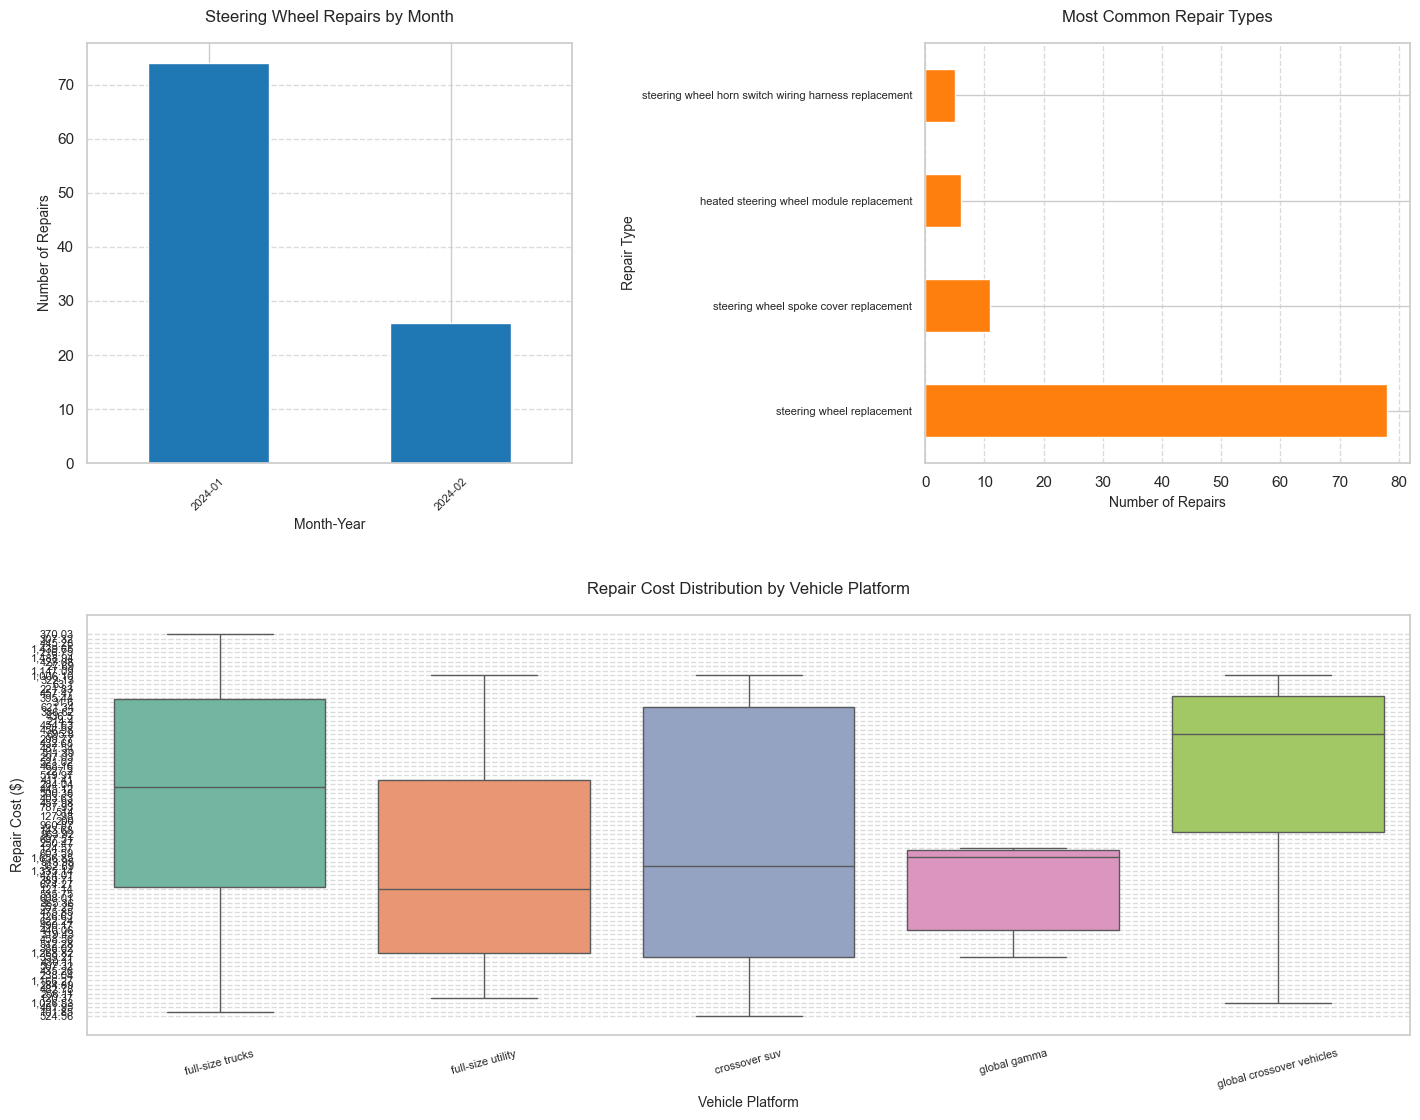

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

# Load cleaned data
df = pd.read_csv('cleaned_data.csv')

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

# Visualization 1: Monthly Repair Trends
plt.subplot(2, 2, 1)
df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'])
monthly_repairs = df['REPAIR_DATE'].dt.to_period('M').value_counts().sort_index()
monthly_repairs.plot(kind='bar', color='#1f77b4')
plt.title('Steering Wheel Repairs by Month', pad=15, fontsize=12)
plt.xlabel('Month-Year', fontsize=10)
plt.ylabel('Number of Repairs', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Visualization 2: Top Repair Types (Horizontal Bar Chart)
plt.subplot(2, 2, 2)
top_repairs = df['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().head(8)
top_repairs.plot(kind='barh', color='#ff7f0e')
plt.title('Most Common Repair Types', pad=15, fontsize=12)
plt.xlabel('Number of Repairs', fontsize=10)
plt.ylabel('Repair Type', fontsize=10)
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Visualization 3: Repair Cost Distribution by Platform
plt.subplot(2, 1, 2)
platform_order = df['PLATFORM'].value_counts().index[:5]  # Top 5 platforms
sns.boxplot(
    x='PLATFORM', 
    y='TOTALCOST', 
    data=df[df['PLATFORM'].isin(platform_order)],
    order=platform_order,
    showfliers=False,
    palette='Set2'
)
plt.title('Repair Cost Distribution by Vehicle Platform', pad=15, fontsize=12)
plt.xlabel('Vehicle Platform', fontsize=10)
plt.ylabel('Repair Cost ($)', fontsize=10)
plt.xticks(fontsize=8, rotation=15)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(pad=3.0)

# Save the visualizations
plt.savefig('steering_wheel_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()